In [1]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

100%|██████████████████████████████████████████████████████████████████████████| 10000/10000 [00:02<00:00, 3490.74it/s]


R:
 [[4 2 None 1 5]
 [3 4 4 2 None]
 [1 None 5 4 5]
 [None 3 3 3 4]
 [2 5 5 None 3]]
P:
 [[-0.06756925  0.20537591  2.3257792 ]
 [ 0.65776347  1.14197172  1.37718767]
 [ 2.02407154  0.7536197   0.97732965]
 [ 1.54778798  0.01467301  0.86939256]
 [ 1.12321461  1.73366159  0.55798017]]
Q:
 [[-0.68042906  1.07845918  1.60468986]
 [ 1.49737036  1.68493659  0.75939115]
 [ 1.4261126   1.65560154  0.88308771]
 [ 1.6741742   0.23064031  0.45784924]
 [ 1.36331965  0.14771106  2.17494768]]
R':
 [[3.9996199  2.01104534 2.29752634 0.9991015  4.99666587]
 [2.9939676  3.9548896  4.04487242 1.99513967 4.06073485]
 [1.00382197 5.04276164 4.99731566 4.00993308 4.99641533]
 [0.35776976 3.00254397 2.9993625  2.99270163 4.00318048]
 [2.00080054 5.02670333 4.96482874 2.53577996 3.00095923]]
Loss: 0.08006271074030004


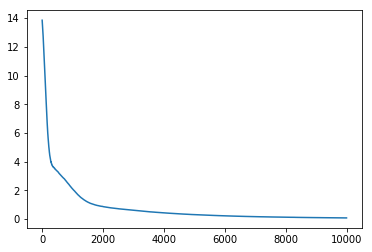

In [2]:
r = np.array([[4, 2, None, 1, 5], [3, 4, 4, 2, None], [1, None, 5, 4, 5], [None, 3, 3, 3, 4], [2, 5, 5, None, 3]])
m, u = r.shape
e = np.zeros((m, u))

k = 3
alpha = 0.001
iters = 10000

p = np.random.rand(m, k)
q = np.random.rand(u, k)

p1 = p.copy()
q1 = q.copy()

loss = []
for n in tqdm(range(iters)):
    e = np.zeros((m, u))
    r1 = np.dot(p, q.T)
    pairs = []
    for i in range(m):
        for j in range(u):
            if r[i][j] != None:
                e[i][j] = r[i][j]-r1[i][j]
                pairs.append((i, j))
    np.random.shuffle(pairs)
    for i, j in pairs:
        p1[i][:] = p[i][:] + 2*alpha*e[i][j]*q[j][:]
        q1[j][:] = q[j][:] + 2*alpha*e[i][j]*p[i][:]
    p = p1.copy()
    q = q1.copy()
    loss.append(np.sqrt(np.sum(e**2)))

print('R:\n',r)
print('P:\n',p)
print('Q:\n',q)
print('R\':\n',np.dot(p, q.T))
print('Loss:',loss[-1])
plt.plot(loss)